## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from textblob import TextBlob
from sklearn.metrics import accuracy_score

## Reading in the cleaned corpus

In [11]:
# Loading dataframe
df = pd.read_csv("final_labelled.csv")

## Getting a DataFrame of reviews by restaurants

In [12]:
# To get unique restaurant names
restaurant_names = []

for rest in df["Name"]: # each restaurant name
    if rest not in restaurant_names: 
        restaurant_names.append(rest)

print(len(restaurant_names)) # number of restaurants

779


In [15]:
# To get restaurant name and respective reviews (separately including date)
reviewsByRestaurant = dict.fromkeys(restaurant_names, "")
for rest in restaurant_names: 
    filtered= []
    reviewsByRestaurant[rest] = [] # to contain a list of sentences for that restaurant    
    filtered = df[df['Name'] == rest]
    for i in range(len(filtered)): 
        review_info = {} # to contain key value pairs of label: sentence, date: date
        review_info['Review'] = str(filtered.iloc[i]['Comment'])
        review_info['Date'] = pd.to_datetime(filtered.iloc[i]['Date'])
        review_info['Label'] = filtered.iloc[i]['Label']
        review_info['Stars'] = filtered.iloc[i]['Star']
        reviewsByRestaurant[rest].append(review_info)

In [16]:
# To get df of restaurant and labels with date
rows = []

for rest in restaurant_names:
    for review_info in reviewsByRestaurant[rest]:
        review_info['Restaurant'] = rest
        rows.append(review_info)

df = pd.DataFrame(rows)
df = df[['Restaurant', 'Review', 'Date', 'Label', 'Stars']]

df.head()

,Restaurant,Review,Date,Label,Stars
0,Fratini La Trattoria,This is one of my absolute favorite restaurant...,2013-03-14,5,5
1,Fratini La Trattoria,I like the relieve from having to decide what ...,2015-02-06,5,4
2,Fratini La Trattoria,It has been a while since I've had such a good...,2016-02-26,2,5
3,Fratini La Trattoria,Not to rub it in but the table next to yours h...,2014-01-18,3,4
4,Fratini La Trattoria,Overall a wonderful dining experience.,2015-02-06,1,4


In [17]:
# Checking datatype for each column
df.dtypes

Restaurant            object
Review                object
Date          datetime64[ns]
Label                  int64
Stars                  int64
dtype: object

In [18]:
# Viewing specifications of dataset
df.shape

(75324, 5)

# Sentiment Analysis

In [3]:
from textblob import TextBlob
import numpy as np
import math
from sklearn.metrics import accuracy_score

In [4]:
# Sentiment polarity analysis for each review
df["sentiment_polarity"] = df.apply (lambda row: TextBlob(row[1]).sentiment.polarity, axis=1)

In [5]:
# Viewing dataframe with sentiment scores
df.head()

,Restaurant,Review,Date,Label,Stars,sentiment_polarity
0,Happy Tummy,fresh ingredient friendly peep and so much che...,2016-04-06,1,5,0.000714
1,Cibo Italiano,a small selection of italian wine by the glass...,2015-12-24,1,4,0.150000
2,Cibo Italiano,cultural relevant singaporean cuisine in very ...,2018-08-19,4,5,0.263750
3,Cibo Italiano,generous with the clam,2016-11-28,1,5,0.000000
4,Yan kee Noodle House,the plus point is that the price remains the s...,2018-12-28,1,4,0.000000


In [6]:
# adjusting sentiment scores to [0 - 1] range
def adj_sentiment(sentiment):
    return ((sentiment + 1)/2)

In [7]:
# adjusting sentiment
df["adjusted_sentiment"] = df.apply (lambda row: adj_sentiment(row[5]), axis=1)

In [8]:
# Viewing daataframe with sentiment scores
df.head()

,Restaurant,Review,Date,Label,Stars,sentiment_polarity,adjusted_sentiment
0,Happy Tummy,fresh ingredient friendly peep and so much che...,2016-04-06,1,5,0.000714,0.500357
1,Cibo Italiano,a small selection of italian wine by the glass...,2015-12-24,1,4,0.150000,0.575000
2,Cibo Italiano,cultural relevant singaporean cuisine in very ...,2018-08-19,4,5,0.263750,0.631875
3,Cibo Italiano,generous with the clam,2016-11-28,1,5,0.000000,0.500000
4,Yan kee Noodle House,the plus point is that the price remains the s...,2018-12-28,1,4,0.000000,0.500000


# Creating Date weights

In [9]:
# Ensuring df shape
df.shape

(1926, 7)

In [64]:
# Creating rank for each row according to restaurant, label and then date
df = df.sort_values(['Restaurant', 'Label', 'Date'], ascending = (True, True, False))
tmp = df.groupby(['Restaurant', 'Label']).size()
rank_range = tmp.map(range)
rank =[(item +1) for sublist in rank_range for item in sublist]
len(rank)

1926

In [65]:
# Creating reciprocal ranks weights for each input
df["weights"] = [1/x for x in rank]

In [66]:
df.head()

,Restaurant,Review,Date,Label,Stars,sentiment_polarity,adjusted_sentiment,weights
293,10 at Claymore,they had a small but good selection of dessert,2017-03-25,1,4,0.225000,0.612500,1.000000
294,10 at Claymore,and expensive tea you know the kind where the ...,2014-10-02,1,4,0.050000,0.525000,0.500000
295,10 at Claymore,freshly made piping hot and generous filling n...,2014-10-02,2,4,0.400000,0.700000,1.000000
297,10 at Claymore,the perfectly cooked meat gave way to a moist ...,2013-04-18,2,4,0.364416,0.682208,0.500000
298,10 at Claymore,i love their penang style prawn noodle that co...,2012-08-19,2,3,0.158333,0.579167,0.333333
299,10 at Claymore,everyone wa friendly but one particular gentle...,2014-12-30,3,5,0.368750,0.684375,1.000000
296,10 at Claymore,order your bread naan chapatti first so they c...,2012-10-17,5,4,0.250000,0.625000,1.000000
1917,126 Eating House,just know that you do not come here for impecc...,2018-10-22,3,4,0.750000,0.875000,1.000000
1879,2it & Drink,the tomato sauce cheese and bread of the marga...,2018-12-23,2,5,0.900000,0.950000,1.000000
615,328 Katong Laksa,it also contained a sorry looking piece of sma...,2019-11-05,2,3,0.036667,0.518333,1.000000


# Star Prediction for each Label

In [67]:
# Creating recency weighted average grouped by 
def grouped_weighted_avg(values, weights, by):
    return (values * weights).groupby(by).sum() / weights.groupby(by).sum()

In [68]:
# Removing label 5 since it is not a preassigned class
clean_data = df[df.Label != 5]

In [92]:
# Calculating exponentially rencency weighted average of sentiment for eah label
label_sentiment = grouped_weighted_avg(clean_data["adjusted_sentiment"], clean_data["weights"], (clean_data["Restaurant"], clean_data["Label"]))

c:\users\seagate pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
# Adjusting sentiment to fit [1,5]
adj_label_sentiment = label_sentiment.apply((lambda x: math.ceil(x*5)))

In [90]:
# Viewing the predicted stars for each predetermined aspect
adj_label_sentiment.head()

Restaurant        Label
10 at Claymore    1        0.583333
                  2        0.673178
                  3        0.684375
126 Eating House  3        0.875000
2it & Drink       2        0.950000
dtype: float64

In [72]:
# Viewing the shape of the dataframe
adj_label_sentiment.shape

(824,)

In [73]:
pred_label = []
for x in adj_label_sentiment:
    pred_label.append(x)

In [105]:
# Calculating exponentially rencency weighted average of stars for labels
label_star = grouped_weighted_avg(clean_data["Stars"], clean_data["weights"], (clean_data["Restaurant"], clean_data["Label"]))

c:\users\seagate pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
adj_label_star = label_star.apply((lambda x: math.ceil(x)))

In [106]:
adj_label_star.head()

Restaurant        Label
10 at Claymore    1        4.000000
                  2        3.818182
                  3        5.000000
126 Eating House  3        4.000000
2it & Drink       2        5.000000
dtype: float64

In [77]:
adj_label_star.shape

(824,)

In [78]:
label_truth = []
for x in adj_label_star:
    label_truth.append(x)

In [79]:
# Accuracy of sentiment predicted stars and the average stars for each label
accuracy_score(label_truth, pred_label)

0.3300970873786408

# Overall Restaurant Star Prediction

In [93]:
# Calculating exponentially rencency weighted average of sentiment overall
overall_sentiment = label_sentiment.groupby("Restaurant").mean()

In [95]:
# Adjusting sentiment to fit [1,5]
overall_sentiment = overall_sentiment.apply((lambda x: math.ceil(x*5)))

In [96]:
overall_sentiment.head()

Restaurant
10 at Claymore      4
126 Eating House    5
2it & Drink         5
328 Katong Laksa    3
8 Korean BBQ        4
dtype: int64

In [97]:
pred_overall = []
for x in overall_sentiment:
    pred_overall.append(x)

In [108]:
# Calculating exponentially rencency weighted average of star overall
overall_star = label_star.groupby("Restaurant").mean()

In [109]:
overall_star = overall_star.apply((lambda x: math.ceil(x)))

In [110]:
overall_star.head()

Restaurant
10 at Claymore      5
126 Eating House    4
2it & Drink         5
328 Katong Laksa    3
8 Korean BBQ        4
dtype: int64

In [111]:
overall_truth = []
for x in overall_star:
    overall_truth.append(x)

In [112]:
# Accuracy of sentiment predicted stars and the average stars overall
accuracy_score(overall_truth, pred_overall)

0.30043859649122806

# Wordcloud Generation for each Category

In [128]:
from wordcloud import WordCloud

In [154]:
# Finding the restaurant with the highest number of reviews
restaurant_highestfreq = df["Restaurant"].value_counts().idxmax()

In [166]:
# Filtering out textual reviews according to labels
filtered_rest = df[df.Restaurant.isin([restaurant_highestfreq])]
taste_fil = filtered_rest[df.Label.isin([2])]
value_fil = filtered_rest[df.Label.isin([1])]
service_fil = filtered_rest[df.Label.isin([3])]
ambience_fil = filtered_rest[df.Label.isin([4])]

c:\users\seagate pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\seagate pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\seagate pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\users\seagate pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


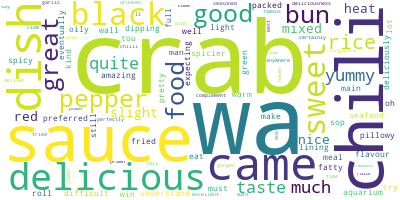

In [167]:
# Wordcloud for taste

# Creating a WordCloud to analyse the data
long_string = ','.join(list(taste_fil["Review"].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

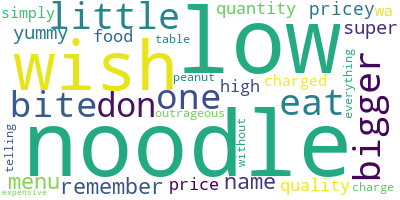

In [168]:
# Wordcloud for price

# Creating a WordCloud to analyse the data
long_string = ','.join(list(value_fil["Review"].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

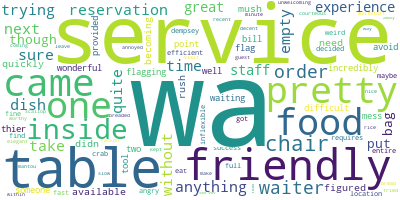

In [163]:
# Wordcloud for service

# Creating a WordCloud to analyse the data
long_string = ','.join(list(service_fil["Review"].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

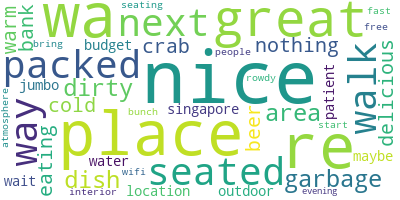

In [162]:
# Wordcloud for ambience

# Creating a WordCloud to analyse the data
long_string = ','.join(list(ambience_fil["Review"].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()